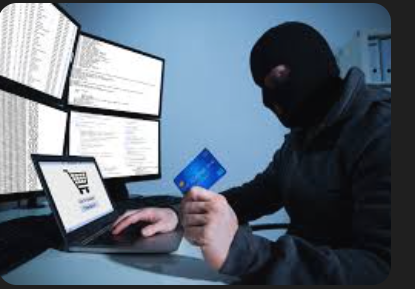

<p style="text-align: center; font-size: 28px;"><b>Predict Credit Card Fraud</b></p>


In this project, the task is to apply **logistic regression** to detect fraudulent credit card transactions.

### Context

* Credit card fraud is a major global issue (estimated \$24B stolen in 2018).
* Logistic regression is one of the most widely used baseline models for fraud detection.
* Dataset:

  * `transactions.csv` → full dataset (200k transactions).
  * `transactions_modified.csv` → smaller dataset (1,000 transactions, for faster prototyping).

### Your Role

As a Data Scientist at a credit card company:

* Load the dataset of transactions.
* Train a logistic regression model to predict **fraud (1)** vs **not fraud (0)**.
* Evaluate performance using confusion matrix, accuracy, precision, recall, and F1 score.

### Workflow

1. **Data Preparation**

   * Load `transactions_modified.csv`.
   * Separate features (`X`) and labels (`y`).
   * Split into training and test sets.

2. **Model Training**

   * Import `LogisticRegression` from sklearn.
   * Fit the model on training data.

3. **Prediction & Evaluation**

   * Use `.predict()` and `.predict_proba()` on test data.
   * Evaluate using confusion matrix, accuracy, precision, recall, F1 score.

4. **Interpretation**

   * Understand the trade-off between **precision** and **recall** in fraud detection.
   * Possibly adjust classification threshold if recall (catching frauds) is more critical.

---

<p style="font-size: 28px;"><b>Import Cell and Load the data</b></p>

In [58]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. The dataset `transactions_modified.csv` contains information on 1,000 simulated credit card transactions. Start by loading the data into a pandas DataFrame called `transactions`. Use `.head()` to preview the first few rows, and `.info()` to check the number of rows and the data types. Finally, determine how many of the transactions are fraudulent and print the result.


In [59]:
transactions = pd.read_csv('data_folder/transactions_modified.csv')
print(transactions.head())
print(transactions.info())

   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   206  CASH_OUT    62927.08   C473782114           0.00            0.00   
1   380   PAYMENT    32851.57  C1915112886           0.00            0.00   
2   570  CASH_OUT  1131750.38  C1396198422     1131750.38            0.00   
3   184  CASH_OUT    60519.74   C982551468       60519.74            0.00   
4   162   CASH_IN    46716.01  C1759889425     7668050.60      7714766.61   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isPayment  \
0  C2096898696       649420.67       712347.75        0          0   
1   M916879292            0.00            0.00        0          1   
2  C1612235515       313070.53      1444820.92        1          0   
3  C1378644910        54295.32       182654.50        1          0   
4  C2059152908      2125468.75      2078752.75        0          0   

   isMovement  accountDiff  
0           1    649420.67  
1           0         0.00  
2           1    818679.85  


In [60]:
faudolent_transactions = transactions[transactions["isFraud"] == 1].value_counts().sum()
print("Tot fraudolent transactions; ", faudolent_transactions)

Tot fraudolent transactions;  282


<p style="font-size: 28px;"><b>Clean the Data</b></p>

In [61]:
# Count fraudulent transactions
fraud_count = transactions["isFraud"].sum()
print("Number of fraudulent transactions:", fraud_count)

Number of fraudulent transactions: 282


2.
Looking at the dataset, combined with our knowledge of credit card transactions in general, we can see that there are a few interesting columns to look at. We know that the amount of a given transaction is going to be important. Calculate summary statistics for this column. What does the distribution look like?

In [62]:
transactions["amount"].describe()

count    1.000000e+03
mean     5.373080e+05
std      1.423692e+06
min      0.000000e+00
25%      2.933705e+04
50%      1.265305e+05
75%      3.010378e+05
max      1.000000e+07
Name: amount, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

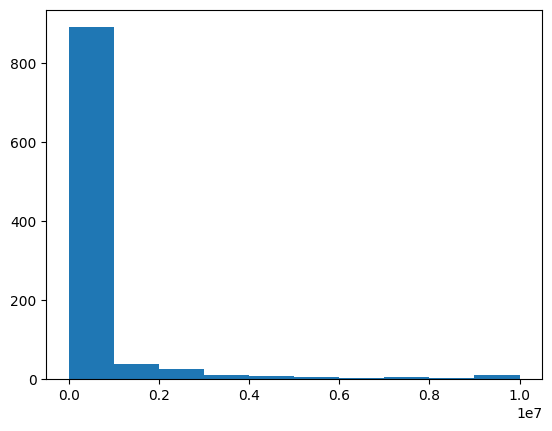

In [63]:
plt.hist(transactions["amount"])
plt.show

3.
We have a lot of information about the type of transaction we are looking at. Let’s create a new column called isPayment that assigns a 1 when type is “PAYMENT” or “DEBIT”, and a 0 otherwise.

In [64]:
transactions["isPayment"] = transactions["type"].apply(lambda x: 1 if x in ["PAYMENT", "DEBIT"] else 0)

4.
Similarly, create a column called isMovement, which will capture if money moved out of the origin account. This column will have a value of 1 when type is either “CASH_OUT” or “TRANSFER”, and a 0 otherwise.

In [65]:
transactions["isMovement"] = transactions["type"].apply(lambda x: 1 if x in ["CASH_OUT", "TRANSFER"] else 0)

5.
With financial fraud, another key factor to investigate would be the difference in value between the origin and destination account. Our theory, in this case, being that destination accounts with a significantly different value could be suspect of fraud. Let’s create a column called accountDiff with the absolute difference of the oldbalanceOrg and oldbalanceDest columns.

In [66]:
transactions["accountDiff"] = np.abs(transactions["oldbalanceOrg"] - transactions["oldbalanceDest"])

<p style="font-size: 28px;"><b>Select and Split the Data</b></p>

6. Define the features and label before training your logistic regression model. Use the following columns for the features:

* `amount`
* `isPayment`
* `isMovement`
* `accountDiff`

The label column is `isFraud`.

So you should create:

* a variable `features` that contains the 4 feature columns,
* a variable `label` that contains the target column `isFraud`.


In [67]:
features = transactions[['amount','isPayment','isMovement','accountDiff']]
label = transactions['isFraud']

7.
Split the data into training and test sets using sklearn‘s train_test_split() method. We’ll use the training set to train the model and the test set to evaluate the model. Use a test_size value of 0.3.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.3)               

8.
Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<p style="font-size: 28px;"><b>Create and Evaluate the Model</b></p>

9.
Create a LogisticRegression model with sklearn and .fit() it on the training data.

Fitting the model find the best coefficients for our selected features so it can more accurately predict our label. We will start with the default threshold of 0.5.

In [70]:
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.coef_)

[[ 7.26076152e-08 -1.69802289e-01 -3.99385212e-01 -9.21758933e-09]]


10.
Run the model’s .score() method on the training data and print the training score.

Scoring the model on the training data will process the training data through the trained model and will predict which transactions are fraudulent. The score returned is the percentage of correct classifications, or the accuracy.

In [71]:
print(model.score(X_train, y_train))

0.72


/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [72]:
print(model.score(X_test, y_test))

0.7133333333333334


/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


12.
Print the coefficients for our model to see how important each feature column was for prediction. Which feature was most important? Least important?

In [73]:
print(model.coef_)

[[ 7.26076152e-08 -1.69802289e-01 -3.99385212e-01 -9.21758933e-09]]


<p style="font-size: 28px;"><b>Predict With the Model</b></p>

13.
Let’s use our model to process more transactions that have gone through our systems. There are three numpy arrays pre-loaded in the workspace with information on new sample transactions under “New transaction data”

#New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

Copy to Clipboard

Create a fourth array, your_transaction, and add any transaction information you’d like. Make sure to enter all values as floats with a .!

In [74]:
# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])
your_transaction = np.array([753371.41, 0.0, 1.0, 427225.5])

In [75]:
sample_transactions = np.stack([transaction1, transaction2, transaction3, your_transaction])
sample_transactions.shape

(4, 4)

15.
Since our Logistic Regression model was trained on scaled feature data, we must also scale the feature data we are making predictions on. Using the StandardScaler object created earlier, apply its .transform() method to sample_transactions and save the result to sample_transactions.

In [76]:
sample_transactions = scaler.transform(sample_transactions)

/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


16.
Which transactions are fraudulent? Use your model’s .predict() method on sample_transactions and print the result to find out.

Want to see the probabilities that led to these predictions? Call your model’s .predict_proba() method on sample_transactions and print the result. The 1st column is the probability of a transaction not being fraudulent, and the 2nd column is the probability of a transaction being fraudulent (which was calculated by our model to make the final classification decision).

In [77]:
y_pred = model.predict(sample_transactions)
y_pred_prob = model.predict_proba(sample_transactions)
print(y_pred)
print(y_pred_prob)

[0 0 0 0]
[[0.71432085 0.28567915]
 [0.62452621 0.37547379]
 [0.6245262  0.3754738 ]
 [0.71432085 0.28567915]]


/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
